In [1]:
# EDA and plotting libraries 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

# Scikit-Learn estimators 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Regression might seem counterintuitive, but we'll address this later
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder


# Model Evaluations
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score # Separate lines to keep everyting "Pythonic"
# from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split 

# To handle warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the CSV file 
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Checking to make sure the import worked
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Getting a general feel for the data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# I'm curious about the number of stroke(1) v. non-stroke(0) patients in the dataset 
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

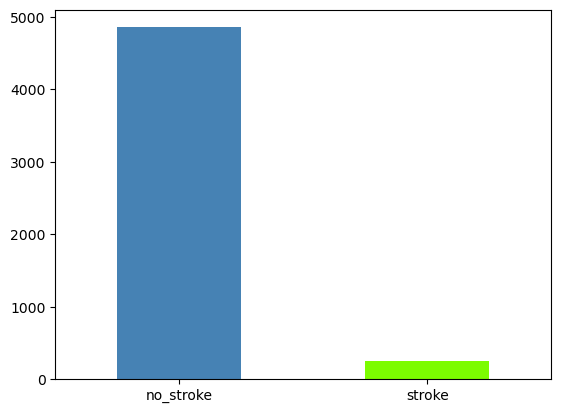

In [5]:
# Let's put this in a plot
st_plot = df["stroke"].value_counts().plot(kind="bar",color=["steelblue","lawngreen"], rot=0)
plt.xticks(ticks=[1,0], labels=["stroke", "no_stroke"]);

In [6]:
# Let's look at the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Checking for missing values 
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df['bmi']=df['bmi'].fillna(np.mean(df['bmi'].mean()))

In [9]:
# Comparing gender with target (stroke) column
pd.crosstab(df.stroke, df.gender)

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


In [10]:
# Finding out which row is Other
df[df["gender"] == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


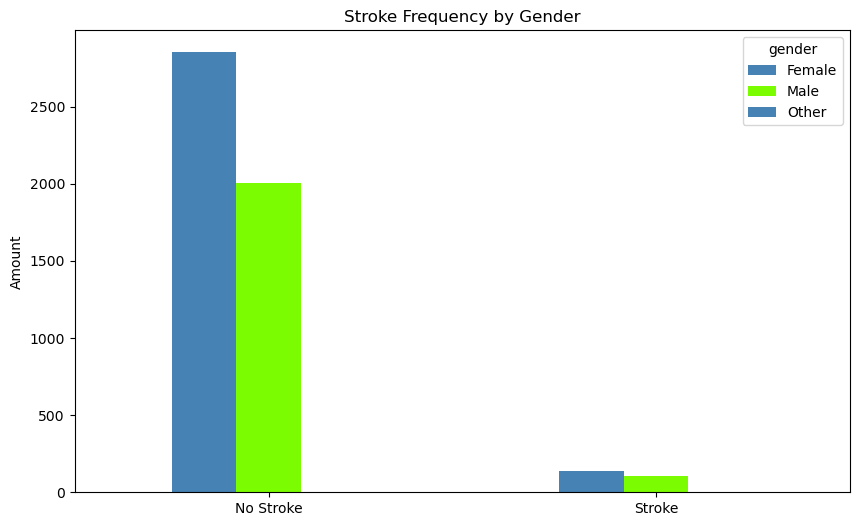

In [11]:
# Let's visualize the gender crosstab from above 
pd.crosstab(df.stroke, df.gender).plot(kind='bar',
                                       figsize=(10,6), 
                                       color=["steelblue","lawngreen"],
                                       rot=0)

# Styling
plt.title("Stroke Frequency by Gender")
plt.xticks(ticks=[0,1],labels=["No Stroke", "Stroke"])
plt.xlabel(None)
plt.ylabel("Amount");

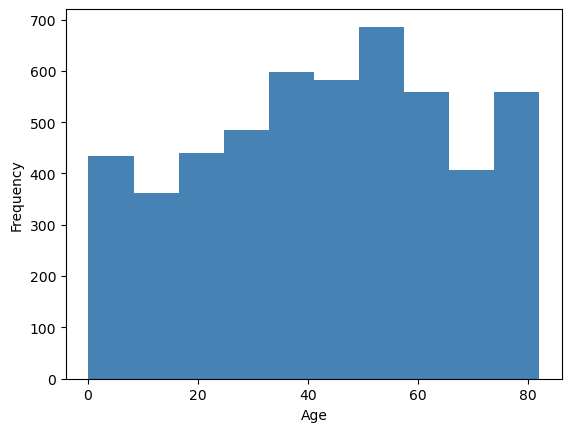

In [12]:
# Let's look at this distribution by ages 
df["age"].plot.hist(color="steelblue")
plt.xlabel("Age");

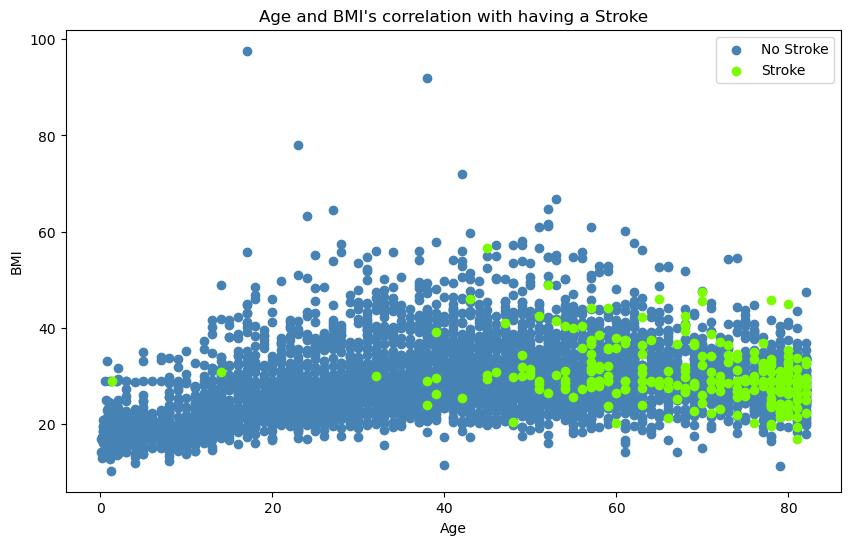

In [13]:
plt.figure(figsize=(10,6))

# Ages and BMI for people who haven't had a stroke
plt.scatter(df.age[df.stroke==0], 
            df.bmi[df.stroke==0],
            c="steelblue")

# Ages and BMI for people who have had a stroke
plt.scatter(df.age[df.stroke==1], 
            df.bmi[df.stroke==1],
            c="lawngreen")

# Styling
plt.title("Age and BMI's correlation with having a Stroke")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["No Stroke", "Stroke"]);


In [14]:
# Looking at the other columns in the dataframe to decide what to explore next
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

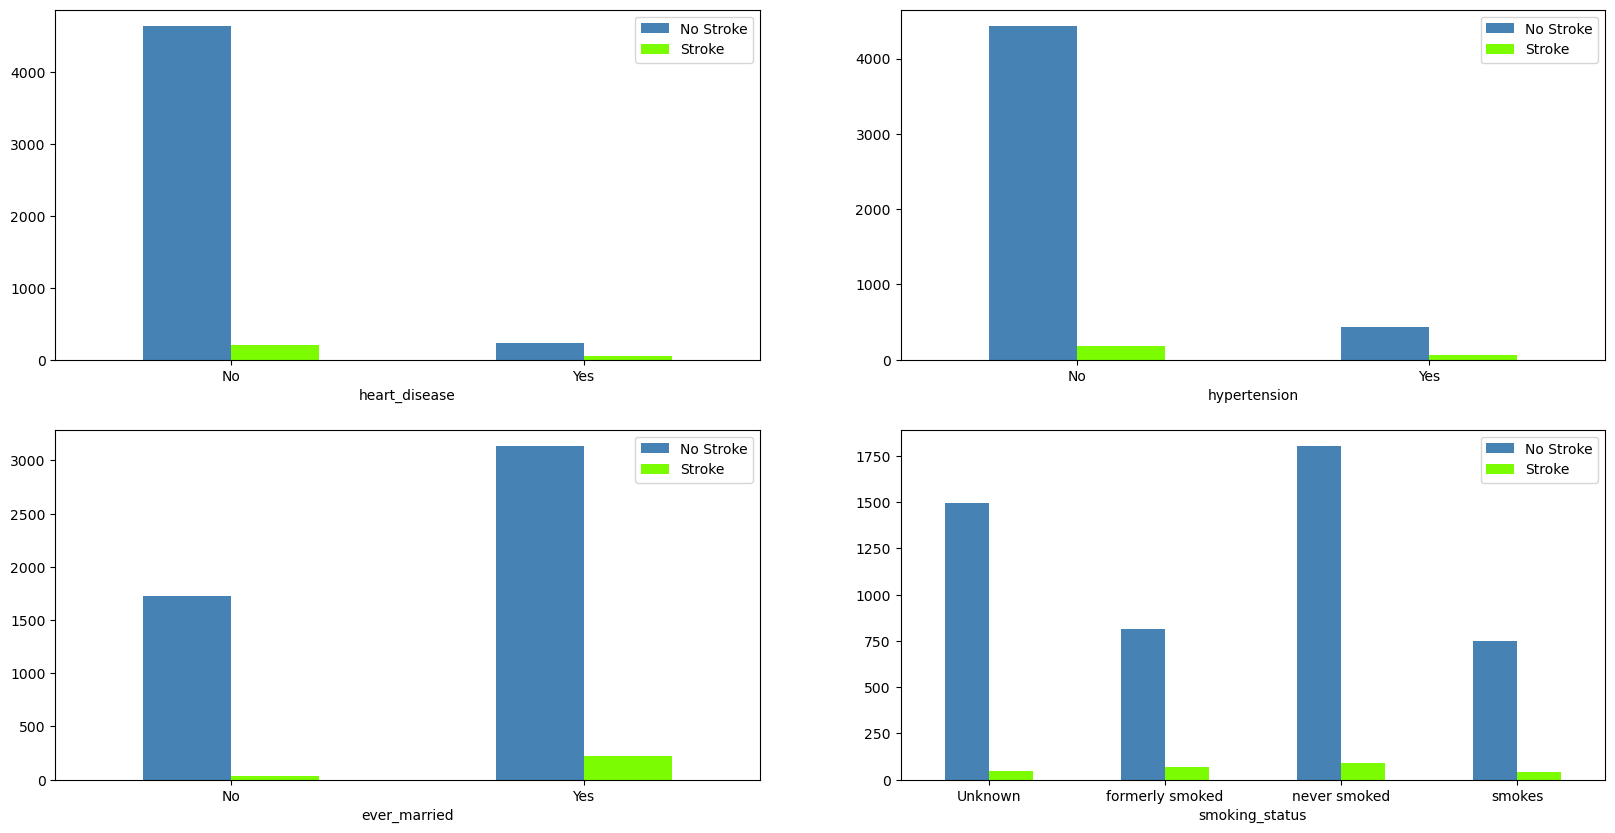

In [15]:
# Creating some crosstab info for some of the remaining columns 
ct1 = pd.crosstab(df.heart_disease,df.stroke)
ct2 = pd.crosstab(df.hypertension,df.stroke)
ct3 = pd.crosstab(df.ever_married,df.stroke)
ct4 = pd.crosstab(df.smoking_status,df.stroke)

# Setting the colors
colors = ["steelblue","lawngreen"]

# Setting up the figure and different axes on the figure
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2, 
                                          figsize=(20,10))

# Plotting each crosstab on a different axis
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ct2.plot(kind='bar',ax=ax2,color=colors,rot=0)
ct3.plot(kind='bar',ax=ax3,color=colors,rot=0)
ct4.plot(kind='bar',ax=ax4,color=colors,rot=0);

# Setting x labels for heart_disease and hypertension
ax1.set_xticklabels(["No","Yes"])
ax2.set_xticklabels(["No","Yes"])

# Changing the lables of the legend
ax1.legend(labels=['No Stroke', 'Stroke'])
ax2.legend(labels=['No Stroke', 'Stroke'])
ax3.legend(labels=['No Stroke', 'Stroke'])
ax4.legend(labels=['No Stroke', 'Stroke']);


In [16]:
# Making our correlation matrix
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


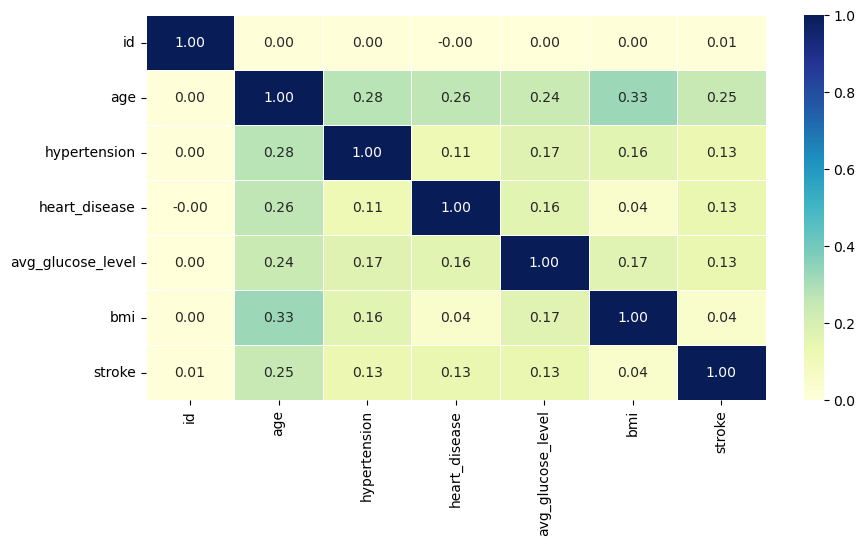

In [17]:
# Let's make the correlation matrix into a heatmap
corr_matrix = df.corr() 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=0.5,
                 fmt=".2f", 
                 cmap="YlGnBu" 
                )

In [18]:
# Checking out the df before I split it
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [19]:
# Noticing that I don't need the id column, so I will drop it
#df.drop("id",axis=1, inplace=True)

In [20]:
# Now let's break up our data into X(as independent features) and y(as target) value
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Checking the shapes
X.shape, y.shape

((5110, 11), (5110,))

In [21]:
# Looking at the number of unique, max, and min values for BMI
len(df["bmi"].value_counts()), min(df["bmi"]), max(df["bmi"])

(419, 10.3, 97.6)

In [22]:
# Checking on the mean and median values
df["bmi"].mean(), df["bmi"].median()

(28.89323691179472, 28.4)

In [23]:
X_train.head(1)

NameError: name 'X_train' is not defined

In [ ]:
''''''

#### Label Encoding - converting qualitative data into quantitative format

In [ ]:
le = LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])
X['ever_married'] = le.fit_transform(X['ever_married'])
X['work_type'] = le.fit_transform(X['work_type'])
X['Residence_type'] = le.fit_transform(X['Residence_type'])
X['smoking_status'] = le.fit_transform(X['smoking_status'])

### Splitting Dataset into train and test part

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
acc = accuracy_score(y_test,rf_pred)
prec = precision_score(y_test,rf_pred,average='weighted')
rec = recall_score(y_test,rf_pred,average='weighted')
f1 = f1_score(y_test,rf_pred,average='micro')
print("Random Forest Classifier Accuracy is :- ",acc)
print("Random Forest Classifier Precision_score is :- ",prec)
print("Random Forest Classifier Recall_score is :- ",rec)
print("Random Forest Classifier f1 Score is :- ",f1)

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(lr_pred,y_test)
lr_prec = precision_score(y_test,lr_pred,average='weighted')
lr_rec = recall_score(y_test,lr_pred,average='weighted')
lr_f1 = f1_score(y_test,lr_pred,average='micro')
print("Logistic Regression Accuracy :- ",lr_acc)
print("Logistic Regression Precision_score is :- ",lr_prec)
print("Logistic Regression  Recall_score is :- ",lr_rec)
print("Logistic Regression f1 Score is :- ",lr_f1)

### K-Neighbors Classifier

In [ ]:
knc = KNeighborsClassifier(n_neighbors=4)
knc.fit(X_train,y_train)
knc_pred = knc.predict(X_test)
knc_acc = accuracy_score(knc_pred,y_test)
knc_prec = precision_score(y_test,knc_pred,average='weighted')
knc_rec = recall_score(y_test,knc_pred,average='weighted')
knc_f1 = f1_score(y_test,knc_pred,average='micro')
print("K-Neighbors Accuracy :- ",knc_acc)
print("K-Neighbors Precision_Score :- ",knc_prec)
print("K-Neighbors Recall_Score :- ",knc_rec)
print("K-Neighbors f1_score :- ",knc_f1)

### Support Vector Classifier

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(knc_pred,y_test)
svc_prec = precision_score(y_test,svc_pred,average='weighted')
svc_rec = recall_score(y_test,svc_pred,average='weighted')
svc_f1 = f1_score(y_test,svc_pred,average='micro')
print("Support Vector Classifier Accuracy :- ",svc_acc)
print("Support Vector Classifier Precision_Score :- ",svc_prec)
print("Support Vector Classifier Recall_Score :- ",svc_rec)
print("Support Vector Classifier f1_score :- ",svc_f1)

## Conclusion :-
##### Here many algorithms applied and got high accuracy score in two algorithms that is RANDOM FOREST CLASSIFIER and LOGISTIC REGRESSION. Both of the accuracy are high and same that is '0.9549'. So, we can select any of them algorithm to classify random inputs from users. Here LOGISTIC REGRESSION has been selected for Random value classification.

## Classification on to Random Input from user...

In [ ]:
gender = float(input("Enter your gender (Select 0 for Female and 1 for Male) : "))
age = float(input("Enter age : "))
hypertension = float(input("Enter hypertension : "))
heart_disease = float(input("Enter Heart Disease : "))
ever_married = float(input("Enter ever_married (0 for No and 1 for Yes) : "))
work_type = float(input("Enter work_type (0 for 'Govt.Job',1 for 'Never worked' 2 for 'Private', 3 for Self 'Employed',4 for 'children') : "))
Residence_type = float(input("Enter residence_type (0 for 'Rural',1 for 'Urban') : "))
avg_glucose = float(input("Enter avg_glucose : "))
bmi = float(input("Enter bmi : "))
smoking_status = float(input("Enter smoking_status (0 for 'Unknown',1 for 'Formaly smoked',2 for 'Never smoked',3 for smokes) : "))

values = np.array([[gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose,bmi,smoking_status]])
print(values)
ran_pred = lr.predict(values)
if ran_pred == 1:
    print("The person would get brain stroke")
else:
    print("Result....\n\n======================\n\n*****The person would not get brain stroke****")


### thankyou